# Report Analysis

This notebook includes different metrics to analyze an execution performance extracting data from its report.

Imports:

In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Report to analyze:

In [4]:
report_name = "report_2024:01:03T14:24:00.json"

with open('../reports/'+report_name, 'r') as file:
    data = json.load(file)

Basic information:

In [5]:
start_time = data["start_time"]
end_time = data["end_time"]
print(f"GA execution - {start_time.split('T')[0]} at {start_time.split('T')[1]}")
print(f"Population size: {len(data['initial_population'])}")
print(f"Mutation rate: {data['mutation_rate']}")
print(f"Selection rate: {data['selection_rate']}")
print(f"Genes limits:")
genes_names = []
for key,value in data["genes_limits"].items():
    genes_names.append(key)
    print(f"\t{key} - {value}")
print("-------------------------------------")
print("Genetic Operators used:")
print(f"\tCrossover: {data['operators']['crossover']}")
print(f"\tFitness: {data['operators']['fitness']}")
print(f"\tMutation: {data['operators']['mutation']}")
print(f"\tSelection: {data['operators']['selection']}")
print(f"\tTermination: {data['operators']['termination']}")
print("-------------------------------------")
print("Results:")
print(f"\tBest individual:")
i = 0
for gene in data["results"]["best_individual"]:
    print(f"\t\t{genes_names[i]} = {gene}")
    i += 1

print(f"\tFitness: {data['results']['fitness']}")
print(f"\tTotal iterations - {len(data['algorithm_execution'])}")
start = datetime.strptime(start_time, "%Y:%m:%dT%H:%M:%S")
end = datetime.strptime(end_time, "%Y:%m:%dT%H:%M:%S")
diff = end - start
print(f"\tTotal time - {(diff.seconds / 3600):.2f} hours")



GA execution - 2024:01:03 at 14:24:00
Population size: 50
Mutation rate: 0.05
Selection rate: 0.5
Genes limits:
	a - [-10, 10]
	b - [-10, 10]
	c - [-2, 2]
	w - [-6, 6]
-------------------------------------
Genetic Operators used:
	Crossover: Blending Crossover
	Fitness: FitnessDistance
	Mutation: Remake Gene Mutation
	Selection: Elitist Selection
	Termination: LowerThan1Simulation
-------------------------------------
Results:
	Best individual:
		a = 6.276513937453103
		b = 7.016208401668809
		c = 0.5025579214430982
		w = 5.913966729652885
	Fitness: 0.16372484556121786
	Total iterations - 9
	Total time - 1.34 hours


Dataframe generation

In [6]:
best_individuals = []
average_individuals = []

for iter,value in data['algorithm_execution'].items():
    best = min(value['fitness'])
    pos = value['fitness'].index(best)
    best_individuals.append({
        'iteration': iter,
        'a': value['population'][pos][0],
        'b': value['population'][pos][1],
        'c': value['population'][pos][2],
        'w': value['population'][pos][3],
        'fitness': best
    })

    average_individuals.append({
        'iteration': iter,
        'fitness': np.mean(value['fitness'])
    })

best_individuals = pd.DataFrame(best_individuals)
print(best_individuals.head())
print("---------------------------------")
average_individuals = pd.DataFrame(average_individuals)
print(average_individuals.head())



  iteration         a         b         c         w   fitness
0         1 -5.200379 -3.064472 -0.140193 -5.180503  0.252775
1         2 -5.200379 -3.064472 -0.140193 -5.180503  1.887180
2         3  9.010099  6.386848  0.756463 -2.205302  1.377494
3         4 -5.200379 -3.064472 -0.140193 -5.180503  0.426477
4         5  6.431473  7.016208  0.481482  5.912249  0.227411
---------------------------------
  iteration    fitness
0         1  10.687853
1         2   9.557568
2         3   8.535198
3         4   7.000389
4         5   4.966649


Best gene values vs fitness

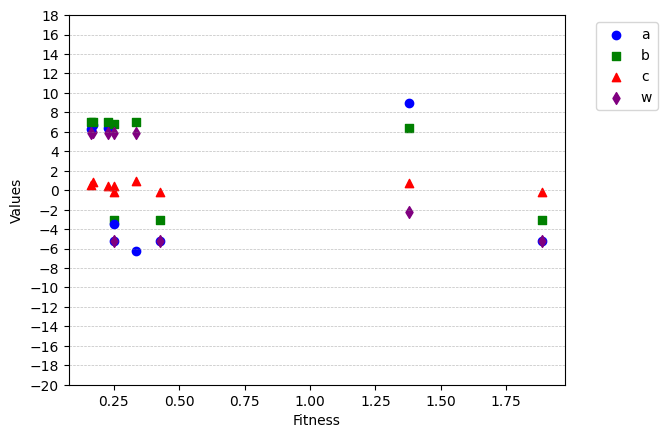

In [7]:
fig, ax = plt.subplots()
for i, row in best_individuals.iterrows():
    ax.scatter(row['fitness'], row['a'], color='blue', marker='o', label='a' if i == 0 else '')
    ax.scatter(row['fitness'], row['b'], color='green', marker='s', label='b' if i == 0 else '')
    ax.scatter(row['fitness'], row['c'], color='red', marker='^', label='c' if i == 0 else '')
    ax.scatter(row['fitness'], row['w'], color='purple', marker='d', label='w' if i == 0 else '')

ax.set_xlabel('Fitness')
ax.set_ylabel('Values')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 

y_ticks = np.arange(-20, 20, 2)
ax.set_yticks(y_ticks, minor=False)
ax.yaxis.grid(which='major', linestyle='--', linewidth='0.5', color='gray', alpha=0.5)


plt.show()

Best fitness per iteration

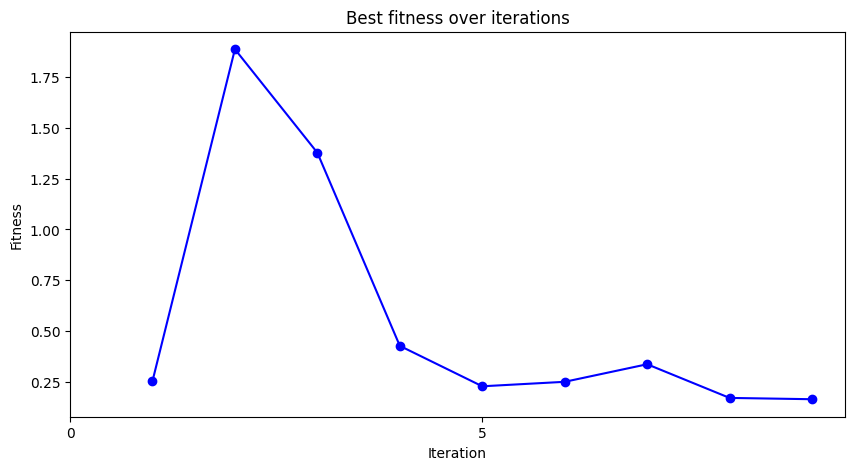

In [8]:
best_individuals['iteration'] = pd.to_numeric(best_individuals['iteration'])

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(best_individuals['iteration'], best_individuals['fitness'], marker='o', linestyle='-', color='b')

plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Best fitness over iterations')

plt.xticks(best_individuals['iteration'][::5]-1, fontsize=10)

plt.show()

Average fitness per iteration

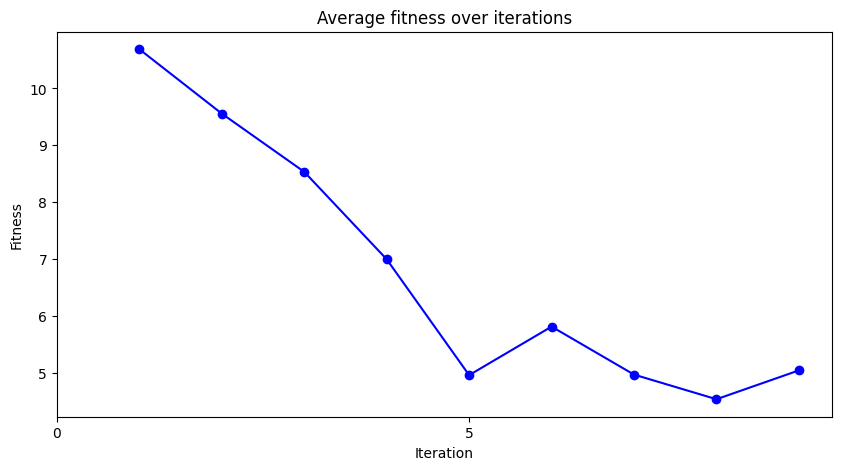

In [9]:
average_individuals['iteration'] = pd.to_numeric(average_individuals['iteration'])

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(average_individuals['iteration'], average_individuals['fitness'], marker='o', linestyle='-', color='b')

plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Average fitness over iterations')

plt.xticks(average_individuals['iteration'][::5]-1, fontsize=10)

plt.show()